In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

In [2]:
df = pd.read_csv('train.csv')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df1 = df.drop('key',axis=1)
df1.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df1.shape

(50000, 7)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        50000 non-null  float64
 1   pickup_datetime    50000 non-null  object 
 2   pickup_longitude   50000 non-null  float64
 3   pickup_latitude    50000 non-null  float64
 4   dropoff_longitude  50000 non-null  float64
 5   dropoff_latitude   50000 non-null  float64
 6   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


pickup datetime is object but should be datetime so need to be converted

we're predicting fare

In [6]:
df1.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [7]:
df1.pickup_datetime = pd.to_datetime(df1.pickup_datetime)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        50000 non-null  float64            
 1   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   50000 non-null  float64            
 3   pickup_latitude    50000 non-null  float64            
 4   dropoff_longitude  50000 non-null  float64            
 5   dropoff_latitude   50000 non-null  float64            
 6   passenger_count    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 2.7 MB


In [8]:
df1.pickup_datetime.head(3)

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        50000 non-null  float64            
 1   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   50000 non-null  float64            
 3   pickup_latitude    50000 non-null  float64            
 4   dropoff_longitude  50000 non-null  float64            
 5   dropoff_latitude   50000 non-null  float64            
 6   passenger_count    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 2.7 MB


In [10]:
df1 = df1.assign(
    hour = df1.pickup_datetime.dt.hour,
    minute = df1.pickup_datetime.dt.minute,
    month = df1.pickup_datetime.dt.month,
    year = df1.pickup_datetime.dt.year,
    day = df1.pickup_datetime.dt.day,
    dayofweek = df1.pickup_datetime.dt.dayofweek,
)

In [11]:
df1.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,minute,month,year,day,dayofweek
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,26,6,2009,15,0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,52,1,2010,5,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,35,8,2011,18,3
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,30,4,2012,21,5
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,51,3,2010,9,1


In [12]:
df1.shape

(50000, 13)

In [13]:
df1.drop('pickup_datetime',axis=1,inplace=True)
df1.shape

(50000, 12)

In [14]:
df1.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,minute,month,year,day,dayofweek
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,26,6,2009,15,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,52,1,2010,5,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,35,8,2011,18,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,30,4,2012,21,5
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,51,3,2010,9,1


To improve accuracy we can calculate distance travelled from longitude and latitude

In [15]:
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    travel = []

    for i in range(len(lat1)):
        
        long1 = radians(lon1[i])
        long2 = radians(lon2[i])
        lati1 = radians(lat1[i])
        lati2 = radians(lat2[i])
      
        # Haversine formula
        dlon = long2 - long1
        dlat = lati2 - lati1
        a = sin(dlat / 2)**2 + cos(lati1) * cos(lati2) * sin(dlon / 2)**2
    
        c = 2 * asin(sqrt(a))
        
        # Radius of earth in kilometers. Use 3956 for miles!
        r = 6371
        dist = c*r
        travel.append(dist)
      
    # calculate the result
    return travel

In [16]:
df1['dist_travel_km'] = distance(df1.pickup_latitude.to_numpy(), df1.dropoff_latitude.to_numpy(), df1.pickup_longitude.to_numpy(), df1.dropoff_longitude.to_numpy())

In [17]:
df1.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,minute,month,year,day,dayofweek,dist_travel_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,26,6,2009,15,0,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,52,1,2010,5,1,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,35,8,2011,18,3,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,30,4,2012,21,5,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,51,3,2010,9,1,1.999157


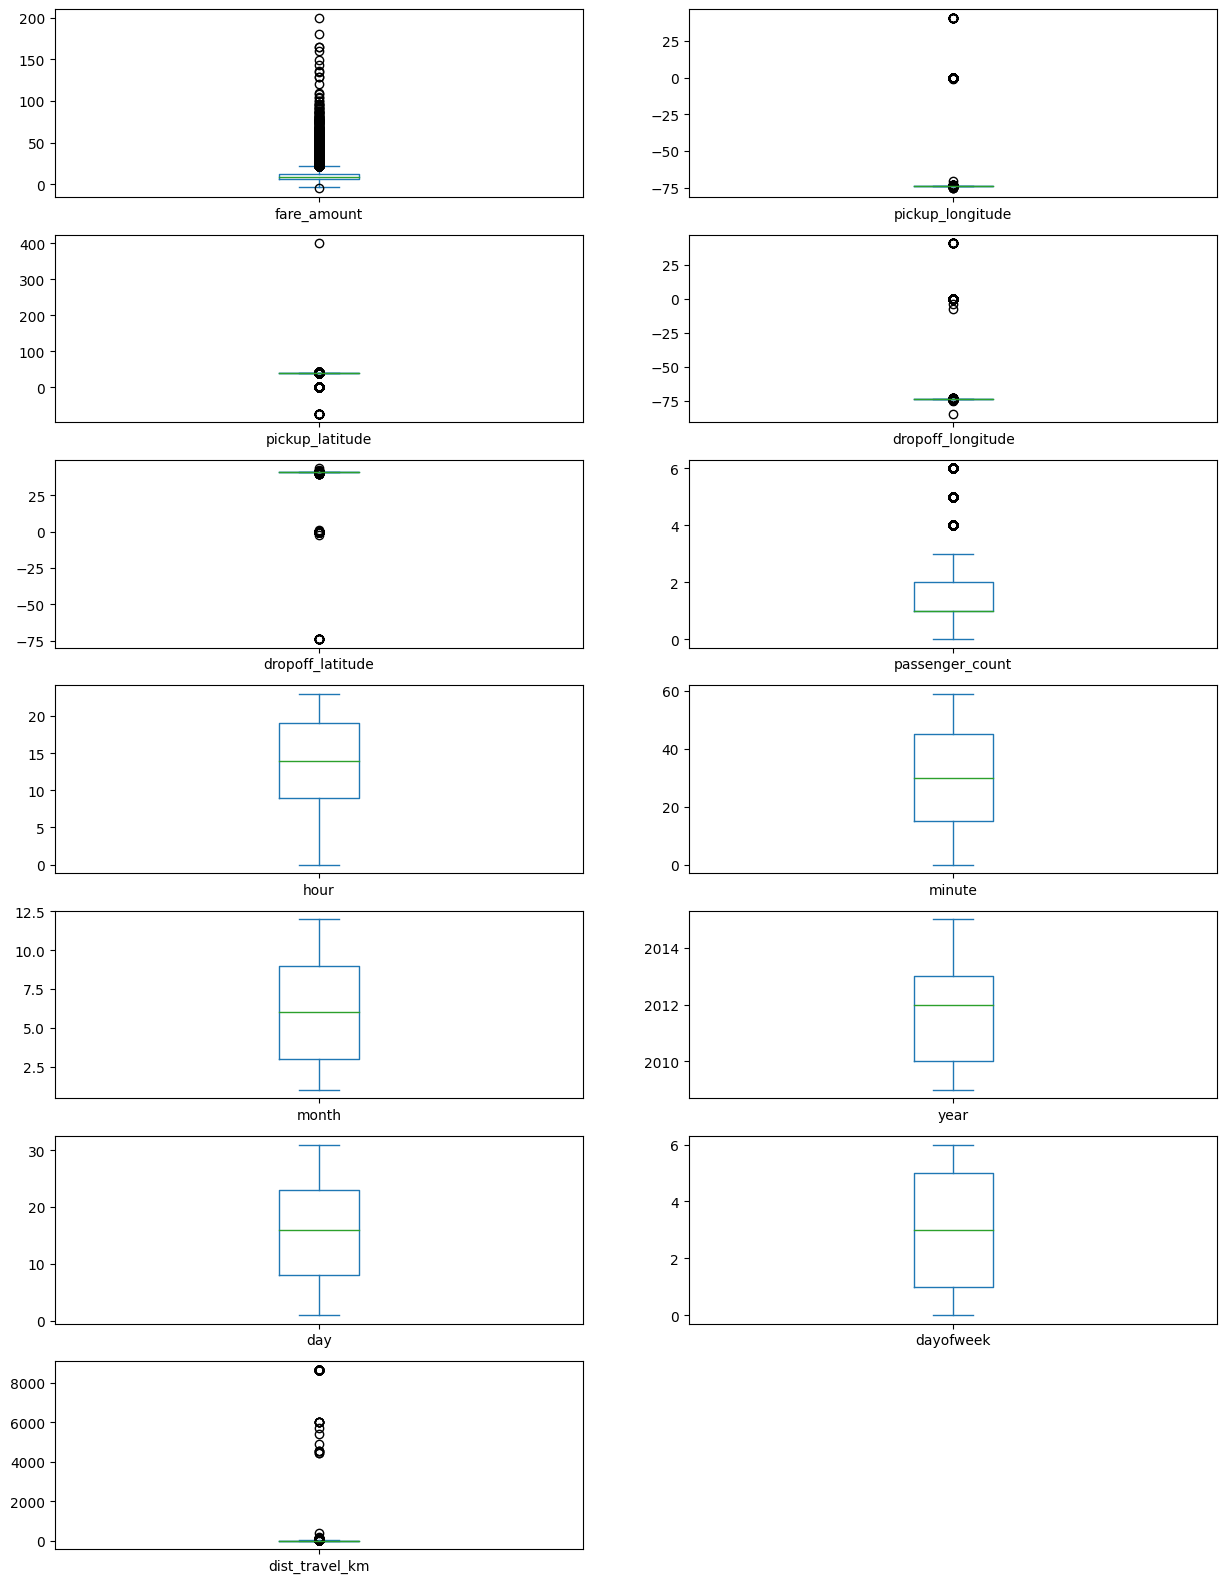

In [18]:
df1.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

We need to see whether we actually need to remove outliers or not!

New function for handling outliers!

In [19]:
df1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,minute,month,year,day,dayofweek,dist_travel_km
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,13.489080,29.665420,6.273300,2011.739260,15.672040,3.029980,18.508946
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,6.506935,17.306535,3.461157,1.862639,8.660789,1.956936,355.564309
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000000,0.000000,1.000000,2009.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,9.000000,15.000000,3.000000,2010.000000,8.000000,1.000000,1.223146
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,14.000000,30.000000,6.000000,2012.000000,16.000000,3.000000,2.120114
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,19.000000,45.000000,9.000000,2013.000000,23.000000,5.000000,3.895570
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,23.000000,59.000000,12.000000,2015.000000,31.000000,6.000000,8667.818812


In [20]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

In [21]:
df1.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,minute,month,year,day,dayofweek,dist_travel_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,26,6,2009,15,0,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,52,1,2010,5,1,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,35,8,2011,18,3,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,30,4,2012,21,5,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,51,3,2010,9,1,1.999157


In [22]:
df1 = treat_outliers_all(df1 , df1.columns.to_list())

In [23]:
df1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,minute,month,year,day,dayofweek,dist_travel_km
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,10.107126,-73.978297,40.750266,-73.976010,40.750478,1.504640,13.489080,29.665420,6.273300,2011.739260,15.672040,3.029980,2.867761
std,5.464402,0.020518,0.025704,0.022836,0.028531,0.867908,6.506935,17.306535,3.461157,1.862639,8.660789,1.956936,2.238482
min,-3.750000,-74.029433,40.686159,-74.032504,40.683678,0.000000,0.000000,0.000000,1.000000,2009.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,9.000000,15.000000,3.000000,2010.000000,8.000000,1.000000,1.223146
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,14.000000,30.000000,6.000000,2012.000000,16.000000,3.000000,2.120114
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,19.000000,45.000000,9.000000,2013.000000,23.000000,5.000000,3.895570
max,22.250000,-73.929777,40.816081,-73.922231,40.818860,3.500000,23.000000,59.000000,12.000000,2015.000000,31.000000,6.000000,7.904207


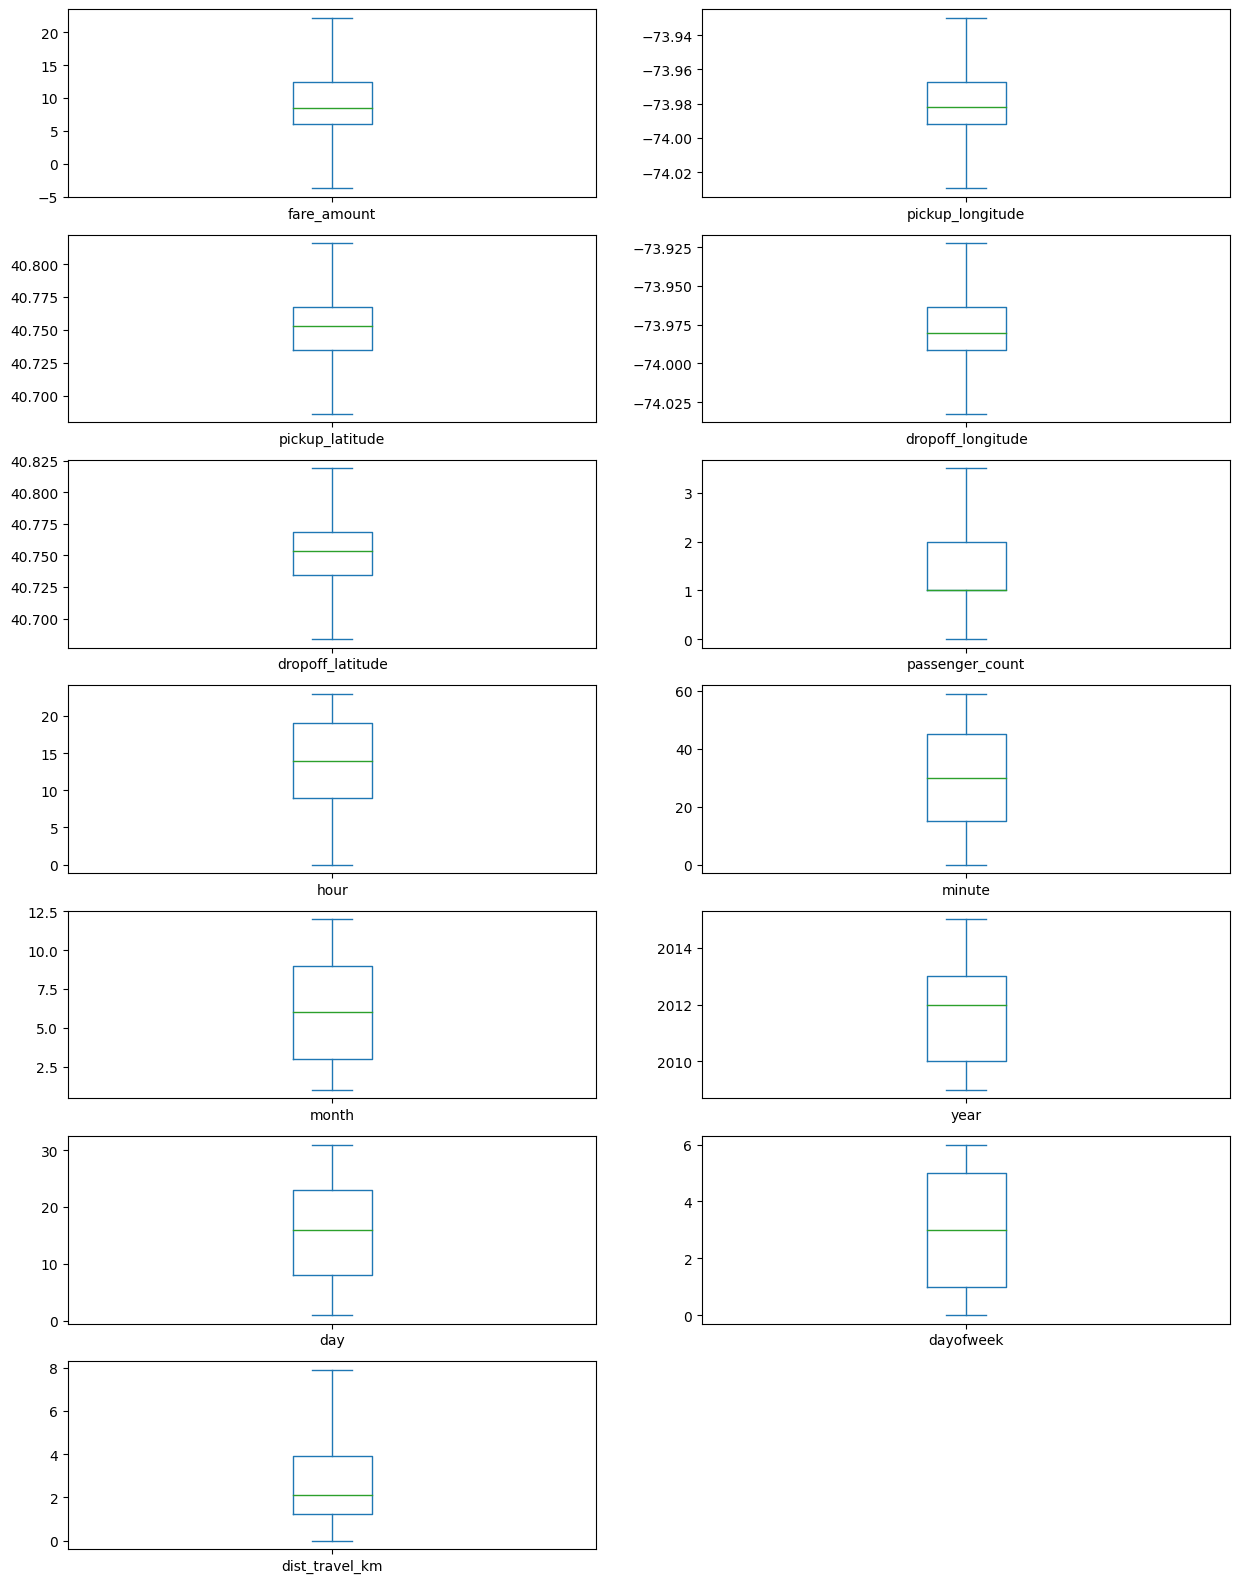

In [24]:
df1.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [25]:
df1.shape

(50000, 13)

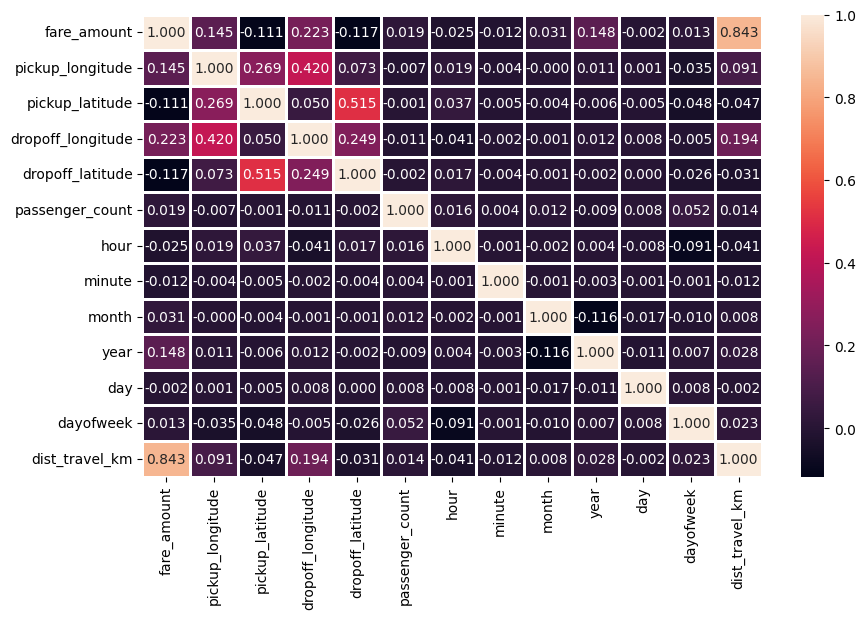

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True,fmt='.3f',linewidths=2)
plt.show()

In [27]:
sns.set_theme(style="ticks")
sns.pairplot(df1, hue="fare_amount")

array([[<AxesSubplot: title={'center': 'fare_amount'}>,
        <AxesSubplot: title={'center': 'pickup_longitude'}>,
        <AxesSubplot: title={'center': 'pickup_latitude'}>,
        <AxesSubplot: title={'center': 'dropoff_longitude'}>],
       [<AxesSubplot: title={'center': 'dropoff_latitude'}>,
        <AxesSubplot: title={'center': 'passenger_count'}>,
        <AxesSubplot: title={'center': 'hour'}>,
        <AxesSubplot: title={'center': 'minute'}>],
       [<AxesSubplot: title={'center': 'month'}>,
        <AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'day'}>,
        <AxesSubplot: title={'center': 'dayofweek'}>],
       [<AxesSubplot: title={'center': 'dist_travel_km'}>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

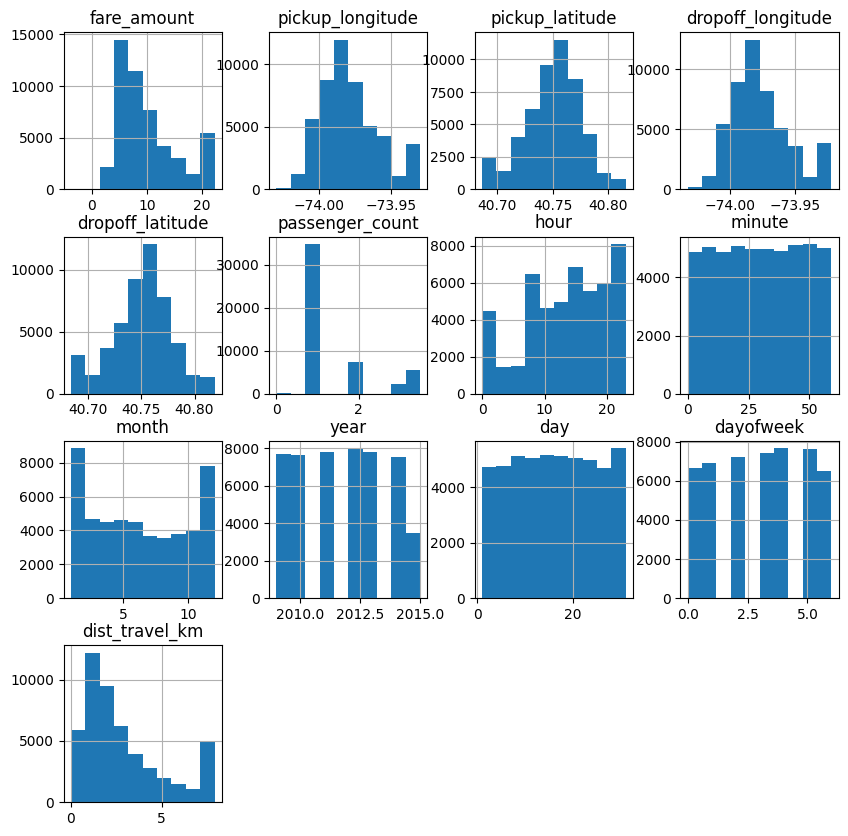

In [27]:
df1.hist(figsize=(10,10))

Train Test Split!

In [28]:
X = df1.drop('fare_amount',axis=1)
y = df1.fare_amount

X.shape, y.shape

((50000, 12), (50000,))

In [29]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 12), (10000, 12), (40000,), (10000,))

In [30]:
from sklearn.linear_model import LinearRegression

# initialize the linear regression model
reg = LinearRegression()

# Train the model with our training data
reg.fit(X_train, y_train)

LinearRegression()

In [31]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [32]:
y_pred_lin = reg.predict(X_test)
print(y_pred_lin)

[10.18367549 20.28977806  6.1159838  ...  9.52816812 20.51781331
  6.51853217]


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test,y_pred_lin)
rmse = sqrt(mean_squared_error(y_test,y_pred_lin))

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}".format(round(mae,3),round(rmse,3)))

Mean Absolute Error: 1.834
Root Mean Square Error: 2.777


Random Forest

We need to scale for RF

In [34]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [35]:
X_train_RF.shape, X_test_RF.shape

((40000, 12), (10000, 12))

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_RF,y_train)

RandomForestRegressor(n_estimators=10)

In [37]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [38]:
y_pred_RF = rf.predict(X_test_RF)
print(y_pred_RF)

[ 8.85  20.34   4.86  ...  8.02  19.365  6.09 ]


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test,y_pred_RF)
rmse = sqrt(mean_squared_error(y_test,y_pred_RF))

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}".format(round(mae,3),round(rmse,3)))

Mean Absolute Error: 1.683
Root Mean Square Error: 2.606


Lesser than LR. But we can improve this by using Gridsearch CV

In [ ]:
from sklearn.model_selection import ParameterGrid
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
pg = ParameterGrid(parameters)
len(pg)

189

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}

rf_cv = RandomForestRegressor(random_state=42)

clf = GridSearchCV(rf_cv, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1000}


In [122]:
y_pred_RF_cv = clf.predict(X_test_RF)
print(y_pred_RF_cv)

[ 8.98817995 20.38304682  5.01003336 ...  8.11375695 21.08004533
  6.90051513]


In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test,y_pred_RF_cv)
rmse = sqrt(mean_squared_error(y_test,y_pred_RF_cv))

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}".format(round(mae,3),round(rmse,3)))

Mean Absolute Error: 1.566
Root Mean Square Error: 2.448


In [127]:
import pickle
pickle.dump(clf, open('rf-cv.pkl', 'wb'))

In [41]:
import pickle
rf_model = pickle.load(open('rf-cv.pkl', 'rb'))

array([14.63808596, 14.63808596, 17.29266408, ..., 13.97950108,
       14.63808596, 14.63808596])

In [42]:
y_pred_RF_cv = rf_model.predict(X_test_RF)
print(y_pred_RF_cv)
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test,y_pred_RF_cv)
rmse = sqrt(mean_squared_error(y_test,y_pred_RF_cv))

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}".format(round(mae,3),round(rmse,3)))

[ 8.98817995 20.38304682  5.01003336 ...  8.11375695 21.08004533
  6.90051513]
Mean Absolute Error: 1.566
Root Mean Square Error: 2.448


In [91]:
from sklearn import metrics 
from sklearn.metrics import r2_score 

cols = ['Model', 'RMSE', 'R-Squared']

results = pd.DataFrame(columns = cols)

lin_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin))
lin_rsquared = r2_score(y_test, y_pred_lin)


full_metrics = pd.Series({'Model': "Linear Regression", 'RMSE' : lin_RMSE, 'R-Squared' : lin_rsquared})

results = results.append(full_metrics, ignore_index = True)

print(results)

               Model      RMSE  R-Squared
0  Linear Regression  2.777277   0.741082


C:\Users\shara\AppData\Local\Temp\ipykernel_11056\836140737.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(full_metrics, ignore_index = True)


In [92]:
RF_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF_cv))
RF_rsquared = r2_score(y_test, y_pred_RF_cv)

full_metrics = pd.Series({'Model': "Random Forest - GridsearchCV", 'RMSE' : RF_RMSE, 'R-Squared' : RF_rsquared})
results = results.append(full_metrics, ignore_index = True)
print(results)

                          Model      RMSE  R-Squared
0             Linear Regression  2.777277   0.741082
1  Random Forest - GridsearchCV  2.447913   0.798852


C:\Users\shara\AppData\Local\Temp\ipykernel_11056\1068412810.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(full_metrics, ignore_index = True)


Now using CNN

In [72]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [75]:
taxi_model = Sequential()
taxi_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
taxi_model.add(Dense(512, activation = "relu"))
taxi_model.add(Dense(1024, activation = "relu"))
taxi_model.add(Dropout(0.2))
taxi_model.add(Dense(1024, activation = "relu"))
taxi_model.add(Dense(512, activation = "relu"))
taxi_model.add(Dense(256, activation = "relu"))
taxi_model.add(Flatten())
taxi_model.add(Dense(512, activation = "relu"))
taxi_model.add(Dropout(0.5))
taxi_model.add(Dense(512, activation = "relu"))
taxi_model.add(Dropout(0.5))
taxi_model.add(Dense(1, activation = "linear",kernel_regularizer = tf.keras.regularizers.l1(l=0.001)))
taxi_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               3328      
                                                                 
 dense_19 (Dense)            (None, 512)               131584    
                                                                 
 dense_20 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_21 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_22 (Dense)            (None, 512)               524800    
                                                                 
 dense_23 (Dense)            (None, 256)              

In [85]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the network :
taxi_model.compile(optimizer=optimizer, loss=tf.keras.losses.MAE, metrics=[tf.keras.metrics.MAE])

In [79]:
m_loss = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [80]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='taximodel.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [81]:
history=taxi_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=128, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


239/250 [===========================>..] - ETA: 0s - loss: 2.3832 - mean_absolute_error: 2.3605
Epoch 1: val_loss improved from inf to 1.97276, saving model to taximodel.h5
250/250 [==============================] - 2s 5ms/step - loss: 2.3715 - mean_absolute_error: 2.3490 - val_loss: 1.9728 - val_mean_absolute_error: 1.9539
Epoch 2/100
236/250 [===========================>..] - ETA: 0s - loss: 2.0100 - mean_absolute_error: 1.9925
Epoch 2: val_loss improved from 1.97276 to 1.75730, saving model to taximodel.h5
250/250 [==============================] - 1s 3ms/step - loss: 2.0066 - mean_absolute_error: 1.9892 - val_loss: 1.7573 - val_mean_absolute_error: 1.7408
Epoch 3/100
238/250 [===========================>..] - ETA: 0s - loss: 1.9338 - mean_absolute_error: 1.9177
Epoch 3: val_loss did not improve from 1.75730
250/250 [==============================] - 1s 3ms/step - loss: 1.9379 - mean_absolute_error: 1.9218 - val_loss: 1.9330 - val_mean_absolute_error: 1.9172
Epoch 4/100
248/250 [===

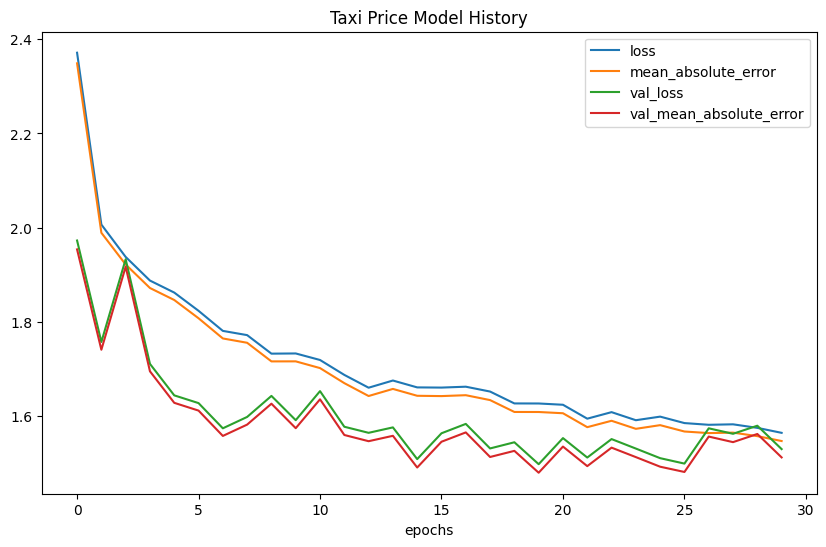

In [82]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('Taxi Price Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [86]:
y_pred_RF_cnn = taxi_model.predict(X_test_RF)
print(y_pred_RF_cnn)

313/313 [==============================] - 1s 2ms/step
[[ 7.9651723]
 [20.726135 ]
 [ 4.679926 ]
 ...
 [ 7.536559 ]
 [20.053244 ]
 [ 5.0717983]]


In [89]:
y_pred_RF_base = rf.predict(X_test_RF)

In [93]:
base_RF_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF_base))
base_RF_rsquared = r2_score(y_test, y_pred_RF_base)


full_metrics = pd.Series({'Model': "Base_RF", 'RMSE' : base_RF_RMSE, 'R-Squared' : base_RF_rsquared})

results = results.append(full_metrics, ignore_index = True)

print(results)

                          Model      RMSE  R-Squared
0             Linear Regression  2.777277   0.741082
1  Random Forest - GridsearchCV  2.447913   0.798852
2                       Base_RF  2.605996   0.772033


C:\Users\shara\AppData\Local\Temp\ipykernel_11056\2098147157.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(full_metrics, ignore_index = True)


In [94]:
CNN_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF_cnn))
CNN_rsquared = r2_score(y_test, y_pred_RF_cnn)


full_metrics = pd.Series({'Model': "CNN", 'RMSE' : CNN_RMSE, 'R-Squared' : CNN_rsquared})

results = results.append(full_metrics, ignore_index = True)

print(results)

                          Model      RMSE  R-Squared
0             Linear Regression  2.777277   0.741082
1  Random Forest - GridsearchCV  2.447913   0.798852
2                       Base_RF  2.605996   0.772033
3                           CNN  2.548847   0.781922


C:\Users\shara\AppData\Local\Temp\ipykernel_11056\3223068020.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(full_metrics, ignore_index = True)


CNN performs better than both RF and LR. But it performs worse than RF using Gridsearch CV. This can be improved by fine tuning the model further!